In [165]:
import numpy as np
from matplotlib import pyplot as plt

In [166]:
N = 10000 # Number of time steps

A = np.zeros(N) # True state
A_hat = np.zeros(N) # Estimate
K = np.zeros(N) # Value of Kalman gain
y = np.zeros(N) # Measurements
p = np.zeros(N) # Estimate variance
xi_all = np.zeros(N) # Measurement variance

In [167]:
k = 0.001 # Growth rate

A0 = 7500   # Initial size = A0*100 µm3 
C0 = 1e6 # D*N*a (where T = 1) = 100 μm2/s * 1 s * 10^8 molecules * 10^-2 μm  = 1 μm3 * 10^8 molecules = 1/100 * 10^8 molecules
A_star = 10000 # Final size

# Initial size
A[0] = A0 

# Variance of estimate and measurement
p[0] = (A0**3)/C0 
xi_all[0] = p[0]

# Make a measurement
y[0] = A[0] + np.random.normal(loc=0.0, scale=np.sqrt(p[0]))

# Take this measurement as the estimate because we have no other information
K[0] = 1 
A_hat[0] = y[0]

In [168]:
for n in range(0, N-1):
    
    # Update growth noise
    d_width = np.sqrt(A[n])
    d = np.random.normal(loc=0.0, scale=np.sqrt(d_width))
#     d = 0
#     d_width = 0
    
    # Update measurement noise
    xi_width = (A[n]**3)/C0
    xi = np.random.normal(loc=0.0, scale=np.sqrt(xi_width))
    xi_all[n+1] = xi_width
    
    # Update the true state
    A[n+1] = A[n] + d - k*(A_hat[n] - A_star)
    
    if A[n+1] <= 0: # True size never goes below 0
        A[n+1] = A[n]
    
    # Predict the true state using the internal model and the previous estimate
    A_hat_ = -k*(A_hat[n] - A_star) + A_hat[n]
    
    # Predict the variance of the estimate
    p_ = (1+k)**2*p[n] + d_width
    
    # Make a measurement
    y[n+1] = A[n+1] + xi
    
    # Calculate optimal Kalman gain 
    K[n+1] = p_ / (p_ + xi_width)
    #K[n+1] = 1
    
    # Best estimate
    A_hat[n+1] = (1 - K[n+1])*A_hat_ + K[n+1]*y[n+1]
    
    # Update the error variance (estimate)
    p[n+1] = (1 - K[n+1])*p_

Text(0.5, 1.0, 'Kalman gain')

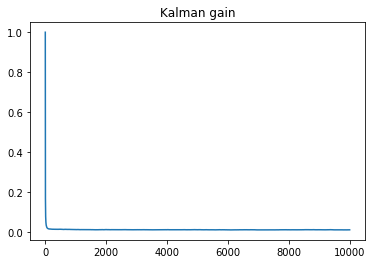

In [169]:
fig = plt.figure()
plt.plot(K)
plt.title('Kalman gain')

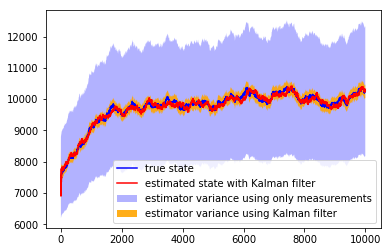

In [170]:
fig, ax = plt.subplots()
ax.plot(A, label='true state', color='blue')
ax.plot(A_hat, label='estimated state with Kalman filter', color='red')
ax.fill_between(x=range(0, N), y1=A-2*np.sqrt(xi_all), y2=A+2*np.sqrt(xi_all), facecolor='blue', alpha=0.3, label='estimator variance using only measurements')
ax.fill_between(x=range(0, N), y1=A-2*np.sqrt(p), y2=A+2*np.sqrt(p), facecolor='orange', alpha=0.9, label='estimator variance using Kalman filter')
ax.legend(loc='lower right')

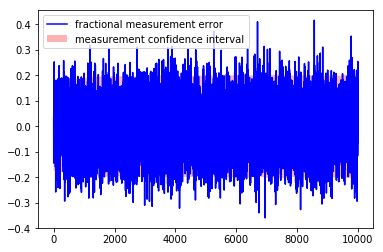

In [171]:
fig, ax = plt.subplots()
ax.plot((y-A)/A, label='fractional measurement error', color='blue')
ax.fill_between(x=range(0, N), y1=-2*np.sqrt(xi_all)/A, y2=2*np.sqrt(xi_all)/A, facecolor='red', alpha=0.3, label='measurement confidence interval')
ax.legend(loc='upper left')

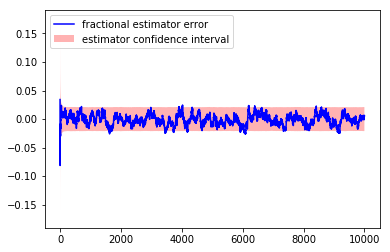

In [172]:
fig, ax = plt.subplots()
ax.plot((A_hat-A)/A, label='fractional estimator error', color='blue')
ax.fill_between(x=range(0, N), y1=-2*np.sqrt(p)/A, y2=2*np.sqrt(p)/A, facecolor='red', alpha=0.3, label='estimator confidence interval')
ax.legend(loc='upper left')